<a href="https://colab.research.google.com/github/johnnyff/bigcontest2021/blob/main/bigcontest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install pycaret


from pycaret.utils import enable_colab
enable_colab()
from pycaret.regression import *


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm


warnings.filterwarnings(action='ignore') 


Colab mode enabled.


In [2]:
df = pd.read_excel('/content/drive/MyDrive/bigcontest/data/bigcontest_dataset.xlsx', header = 1)
df

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0              1        2006           7          10           8  189.100000   
1              1        2006           7          10           9  216.951962   
2              1        2006           7          10          10  251.424419   
3              1        2006           7          10          11  302.812199   
4              1        2006           7          10          12  384.783406   
...          ...         ...         ...         ...         ...         ...   
3046          26        2018           7           7          17         NaN   
3047          26        2018           7           7          18         NaN   
3048          26        2018           7           7          19         NaN   
3049          26        2018           7           7          20         NaN   
3050          26        2018           7           7          21         NaN   

      유역평균강수  강우(A지역)  강우(B지역)  강우(C지역)  강우(D지역)  수위(E지역)    수위(D지역)  \
0     6.4000        7        7        7        8     2.54  122.56875   
1     6.3000        7        8        7        8     2.53  122.56250   
2     6.4000        7        9        7        8     2.53  122.55625   
3     7.3000        7       10        7        8     2.53  122.55625   
4     8.2000        7       12        8       10     2.53  122.55625   
...      ...      ...      ...      ...      ...      ...        ...   
3046  2.3689        1        0        0        0     3.16  129.99375   
3047  2.3689        1        0        0        0     3.15  130.00625   
3048  2.3689        1        0        0        0     3.13  130.01250   
3049  2.3689        1        0        0        0     3.11  130.01875   
3050  2.3689        1        0        0        0     3.10  130.01875   

      유역평균강수.1  강우(A지역).1  강우(B지역).1  강우(C지역).1  강우(D지역).1  수위(E지역).1  \
0       6.3000          7          7          7          8       2.54   
1       6.4000          7          8          7          8       2.53   
2       7.3000          7          9          7          8       2.53   
3       8.2000          7         10          8          8       2.53   
4      11.3000          9         12         10         10       2.53   
...        ...        ...        ...        ...        ...        ...   
3046    2.3689          1          0          0          0       3.16   
3047    2.3689          1          0          0          0       3.15   
3048    2.3689          1          0          0          0       3.13   
3049    2.3689          1          0          0          0       3.11   
3050    2.3689          1          0          0          0       3.10   

       수위(D지역).1  유역평균강수.2  강우(A지역).2  강우(B지역).2  강우(C지역).2  강우(D지역).2  \
0     122.541667    6.3000          7          7          7          8   
1     122.550000    6.4000          7          8          7          8   
2     122.558333    7.3000          7          9          8          8   
3     122.566667    8.2000          7         10         10         10   
4     122.575000   11.3000          9         12         10         11   
...          ...       ...        ...        ...        ...        ...   
3046  130.016667    2.3689          1          0          0          0   
3047  130.025000    2.3689          1          0          0          0   
3048  130.025000    2.3689          1          0          0          0   
3049  130.025000    2.3689          1          0          0          0   
3050  130.025000    2.3689          1          0          0          0   

      수위(E지역).2   수위(D지역).2  유역평균강수.3  강우(A지역).3  강우(B지역).3  강우(C지역).3  \
0          2.54  122.550000    6.4000          7          7          8   
1          2.53  122.558333    7.3000          7          8         10   
2          2.53  122.566667    8.2000          7          9         10   
3          2.53  122.575000   11.3000          9         10         15   
4          2.53  122.575000   14.4000       

In [3]:
columns = ['num','year','month','day','hour','target',
           'average_rain_1','a_rain_1','b_rain_1','c_rain_1','d_rain_1','e_level_1','d_level_1',
           'average_rain_2','a_rain_2','b_rain_2','c_rain_2','d_rain_2','e_level_2','d_level_2',
           'average_rain_3','a_rain_3','b_rain_3','c_rain_3','d_rain_3','e_level_3','d_level_3',
           'average_rain_4','a_rain_4','b_rain_4','c_rain_4','d_rain_4','e_level_4','d_level_4',
           'average_rain_5','a_rain_5','b_rain_5','c_rain_5','d_rain_5','e_level_5','d_level_5',
           'average_rain_6','a_rain_6','b_rain_6','c_rain_6','d_rain_6','e_level_6','d_level_6'
           ]

In [4]:
df.columns =columns
df

num  year  month  day  hour      target  average_rain_1  a_rain_1  \
0       1  2006      7   10     8  189.100000          6.4000         7   
1       1  2006      7   10     9  216.951962          6.3000         7   
2       1  2006      7   10    10  251.424419          6.4000         7   
3       1  2006      7   10    11  302.812199          7.3000         7   
4       1  2006      7   10    12  384.783406          8.2000         7   
...   ...   ...    ...  ...   ...         ...             ...       ...   
3046   26  2018      7    7    17         NaN          2.3689         1   
3047   26  2018      7    7    18         NaN          2.3689         1   
3048   26  2018      7    7    19         NaN          2.3689         1   
3049   26  2018      7    7    20         NaN          2.3689         1   
3050   26  2018      7    7    21         NaN          2.3689         1   

      b_rain_1  c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  \
0            7         7         8       2.54  122.56875          6.3000   
1            8         7         8       2.53  122.56250          6.4000   
2            9         7         8       2.53  122.55625          7.3000   
3           10         7         8       2.53  122.55625          8.2000   
4           12         8        10       2.53  122.55625         11.3000   
...        ...       ...       ...        ...        ...             ...   
3046         0         0         0       3.16  129.99375          2.3689   
3047         0         0         0       3.15  130.00625          2.3689   
3048         0         0         0       3.13  130.01250          2.3689   
3049         0         0         0       3.11  130.01875          2.3689   
3050         0         0         0       3.10  130.01875          2.3689   

      a_rain_2  b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  \
0            7         7         7         8       2.54  122.541667   
1            7         8         7         8       2.53  122.550000   
2            7         9         7         8       2.53  122.558333   
3            7        10         8         8       2.53  122.566667   
4            9        12        10        10       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
3046         1         0         0         0       3.16  130.016667   
3047         1         0         0         0       3.15  130.025000   
3048         1         0         0         0       3.13  130.025000   
3049         1         0         0         0       3.11  130.025000   
3050         1         0         0         0       3.10  130.025000   

      average_rain_3  a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3  \
0             6.3000         7         7         7         8       2.54   
1             6.4000         7         8         7         8       2.53   
2             7.3000         7         9         8         8       2.53   
3             8.2000         7        10        10        10       2.53   
4            11.3000         9        12        10        11       2.53   
...              ...       ...       ...       ...       ...        ...   
3046          2.3689         1         0         0         0       3.16   
3047          2.3689         1         0         0         0       3.15   
3048          2.3689         1         0         0         0       3.13   
3049          2.3689         1         0         0         0       3.11   
3050          2.3689         1         0         0         0       3.10   

       d_level_3  average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  \
0     122.550000          6.4000         7         7         8         8   
1     122.558333          7.3000         7         8        10        10   
2     122.566667          8.2000         7         9        10        11   
3     122.575000         11.3000         9        10        15        14   
4     122.575000         14.4000        12        12      

### 데이터 전처리

결측치 확인

In [20]:

df.isnull().sum()

num                     0
year                    0
month                   0
day                     0
hour                    0
target                  0
average_rain_1          0
a_rain_1                0
b_rain_1                0
c_rain_1                0
d_rain_1                0
e_level_1               0
d_level_1               0
average_rain_2          0
a_rain_2                0
b_rain_2                0
c_rain_2                0
d_rain_2                0
e_level_2               0
d_level_2               0
average_rain_3          0
a_rain_3                0
b_rain_3                0
c_rain_3                0
d_rain_3                0
e_level_3               0
d_level_3               0
average_rain_4          0
a_rain_4                0
b_rain_4                0
c_rain_4                0
d_rain_4                0
e_level_4               0
d_level_4               0
average_rain_5          0
a_rain_5                0
b_rain_5                0
c_rain_5                0
d_rain_5    

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Columns: 131 entries, year to d_level_6_6hour
dtypes: float64(103), int64(28)
memory usage: 2.9 MB


In [23]:
df.describe()

year        month          day         hour        target  \
count  2891.000000  2891.000000  2891.000000  2891.000000   2891.000000   
mean   2010.765825     7.426496    15.719474    12.534763   1746.902717   
std       2.717014     0.701242     7.594878     6.947735   2181.790290   
min    2006.000000     6.000000     1.000000     1.000000      3.541153   
25%    2009.000000     7.000000    11.000000     7.000000    384.762514   
50%    2011.000000     7.000000    15.000000    13.000000   1065.549253   
75%    2012.000000     8.000000    21.000000    19.000000   2213.014288   
max    2017.000000     9.000000    31.000000    24.000000  21504.402260   

       average_rain_1     a_rain_1     b_rain_1     c_rain_1     d_rain_1  \
count     2891.000000  2891.000000  2891.000000  2891.000000  2891.000000   
mean        68.196146    79.865790    64.320996    40.029747    53.355240   
std         60.221899    72.820217    64.530822    45.931246    56.709941   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%         19.606950    23.000000    13.000000     3.000000     6.500000   
50%         58.900000    55.000000    51.000000    22.000000    34.000000   
75%        103.226400   123.500000    91.000000    64.000000    85.000000   
max        328.400000   329.000000   367.000000   253.000000   262.000000   

         e_level_1    d_level_1  average_rain_2     a_rain_2     b_rain_2  \
count  2891.000000  2891.000000     2891.000000  2891.000000  2891.000000   
mean      4.583075   131.868337       68.708745    83.111726    63.459011   
std       2.422497     6.007137       60.169117    73.870215    64.041185   
min       1.070000   118.700000        0.000000     0.000000     0.000000   
25%       2.740000   127.578125       20.131550    23.500000    13.000000   
50%       4.080000   133.312500       59.400000    58.000000    49.000000   
75%       5.680000   135.325000      103.413650   129.000000    90.000000   
max      16.720000   143.893750      328.400000   337.000000   367.000000   

          c_rain_2     d_rain_2    e_level_2    d_level_2  average_rain_3  \
count  2891.000000  2891.000000  2891.000000  2891.000000     2891.000000   
mean     39.464199    53.355240     4.583075   131.937138       68.708745   
std      45.330341    56.709941     2.422497     6.008561       60.169117   
min       0.000000     0.000000     1.070000   118.700000        0.000000   
25%       3.000000     6.500000     2.740000   127.629167       20.131550   
50%      22.000000    34.000000     4.080000   133.325000       59.400000   
75%      64.000000    85.000000     5.680000   135.504167      103.413650   
max     251.000000   262.000000    16.720000   143.966667      328.400000   

          a_rain_3     b_rain_3     c_rain_3     d_rain_3    e_level_3  \
count  2891.000000  2891.000000  2891.000000  2891.000000  2891.000000   
mean     83.111726    57.274991    39.700796    53.777240     4.583075   
std      73.870215    60.574060    45.295280    56.726475     2.422497   
min       0.000000     0.000000     0.000000     0.000000     1.070000   
25%      23.500000     9.000000     3.000000     7.000000     2.740000   
50%      58.000000    43.000000    22.000000    35.000000     4.080000   
75%     129.000000    84.000000    64.000000    85.000000     5.680000   
max     337.000000   357.000000   251.000000   262.000000    16.720000   

         d_level_3  average_rain_4     a_rain_4     b_rain_4     c_rain_4  \
count  2891.000000     2891.000000  2891.000000  2891.000000  2891.000000   
mean    131.973432       69.212519    84.734694    57.274991    51.492909   
std       6.005784       60.106956    74.374884    60.574060    52.108792   
min     118.700000        0.017700     0.000000     0.000000     0.000000   
25%     127.641667       20.691100    25.000000     9.000000    10.000000   
50%     133.341667       59.852400    61.000000    43.000000    34.000000   
75%     135.566667      103.424300   130.000000   

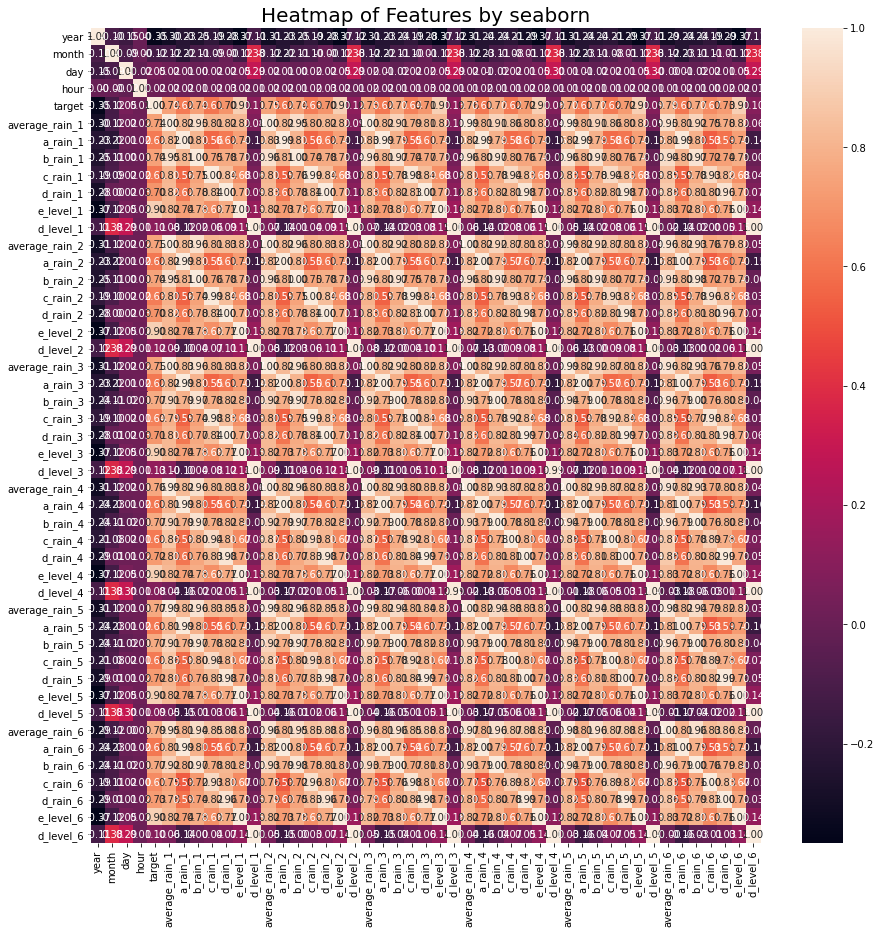

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot= True, fmt = ".2f")

plt.title('Heatmap of Features by seaborn',fontsize=20)

plt.show()

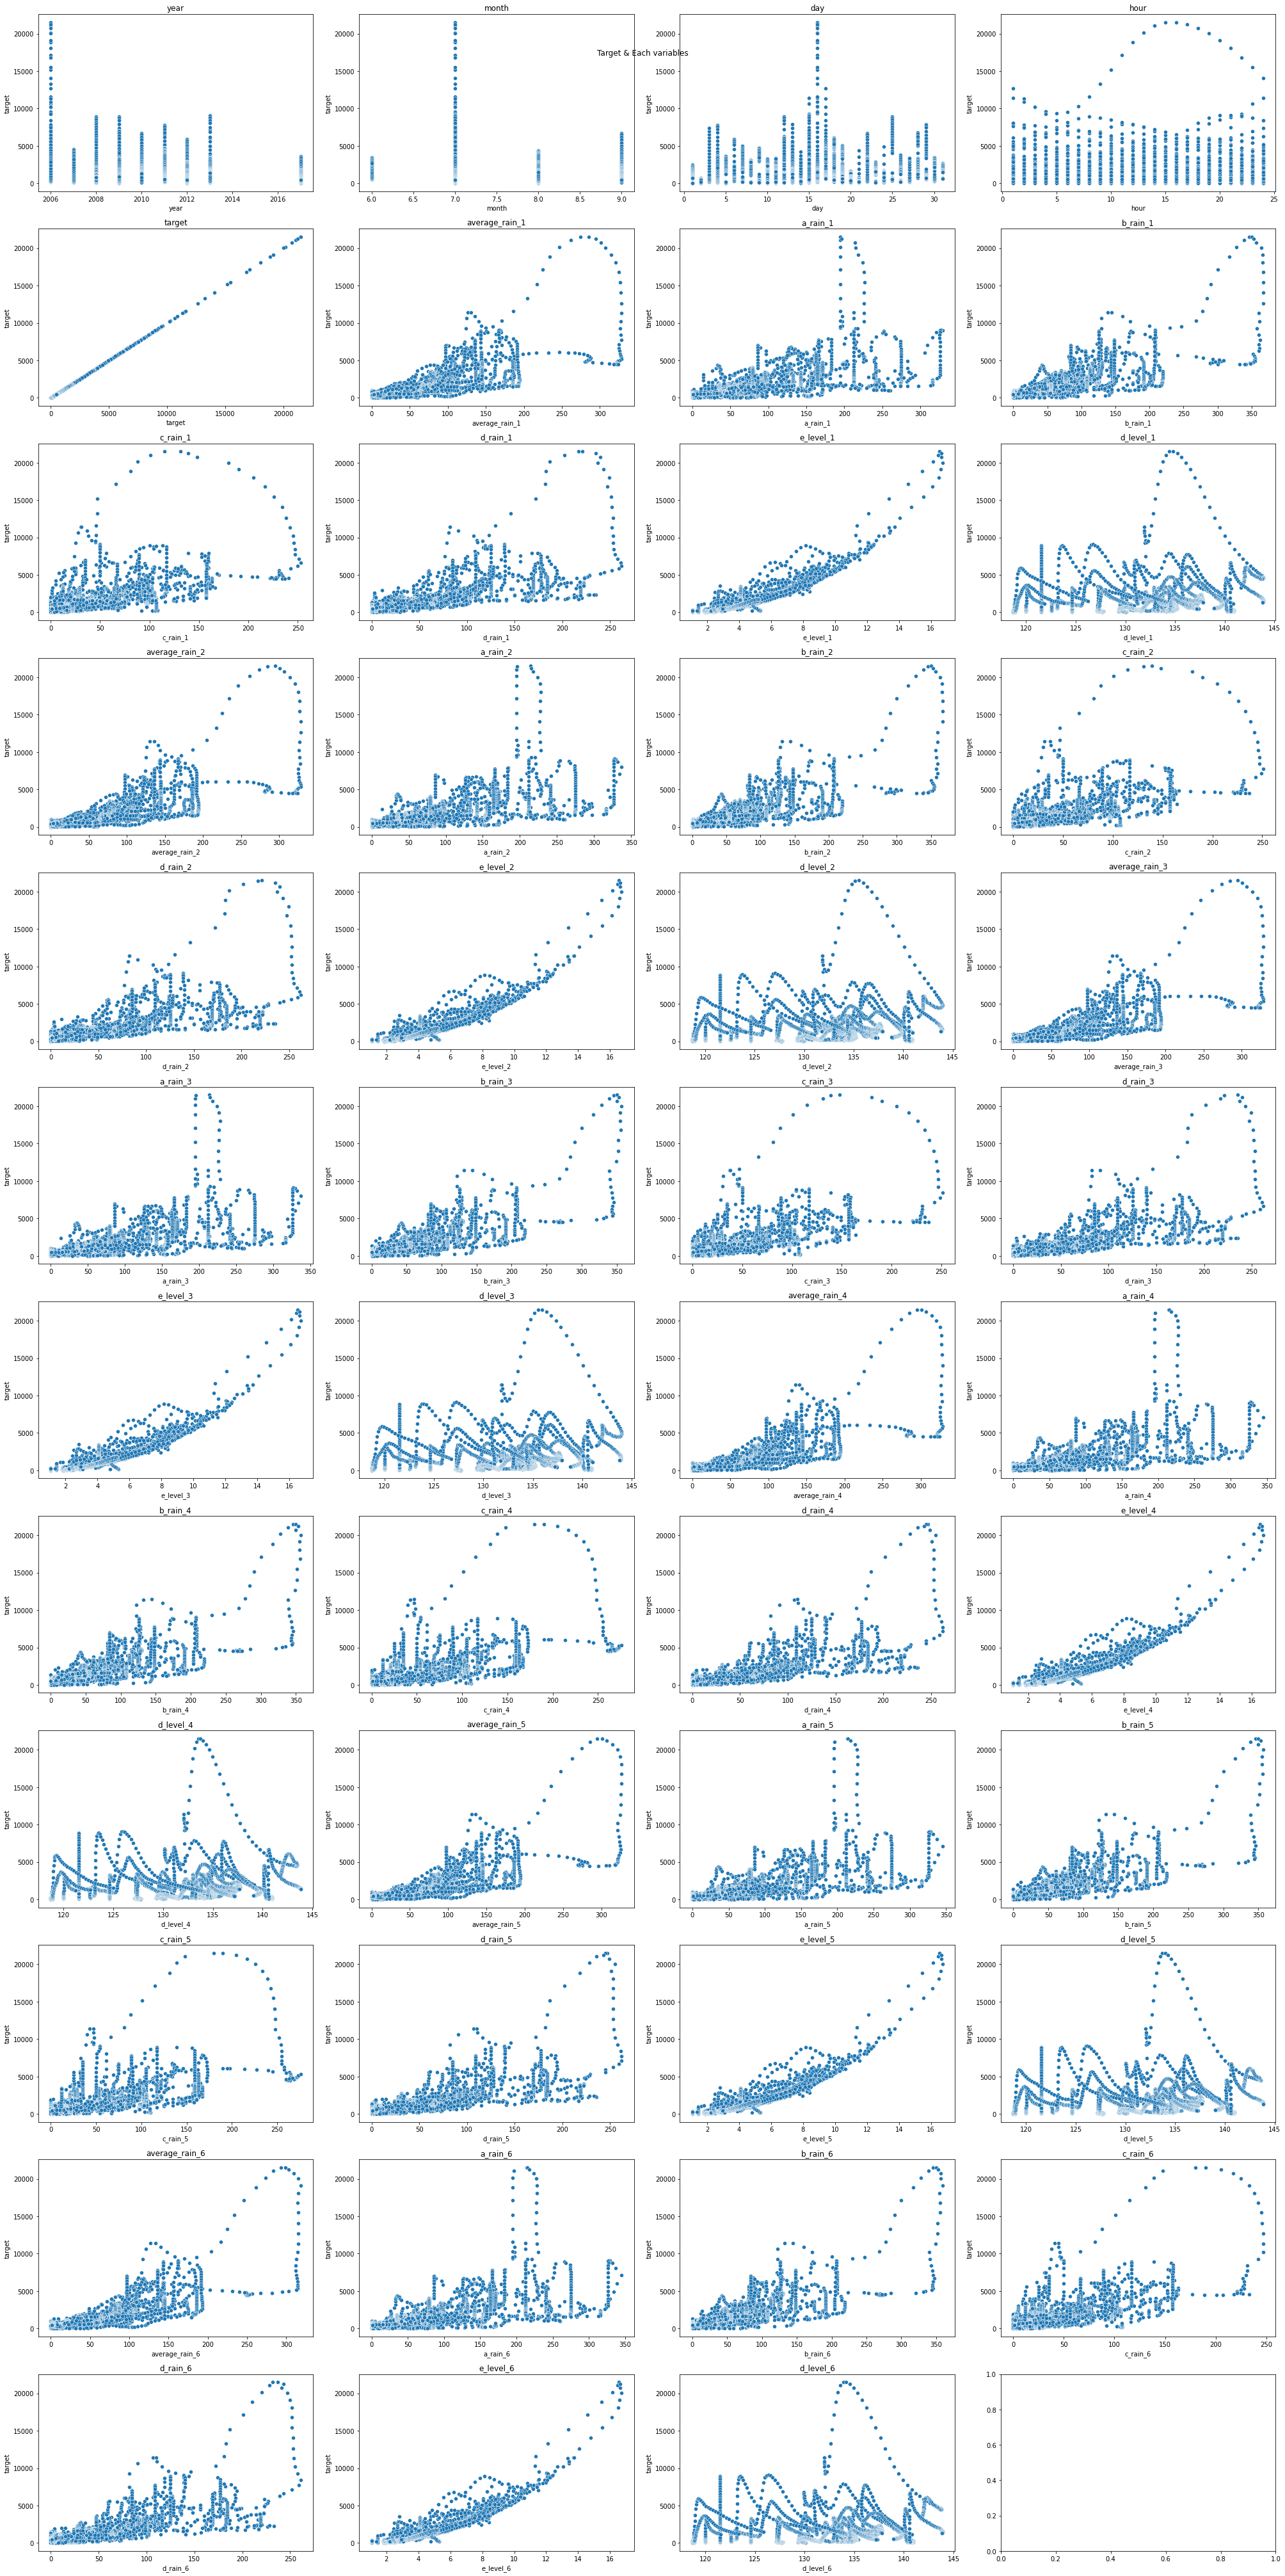

In [22]:
fig, ax = plt.subplots(12,4, figsize=(28,56))
ax = ax.flatten()

fig.suptitle("Target & Each variables")

for i, column in enumerate(df.columns):
  sns.scatterplot(x= column, y= 'target', data = df_train, ax = ax[i])
  ax[i].set(title = column)
plt.tight_layout()

특정 날짜에 특별한 움직임이 보이는 것 같음
* 더 이상의 EDA는 진행하지 않음. 각 데이터는 독립! (주어짐)

In [10]:
for column in df.columns[6:48]:
  new = column+"_3hour"
  df[new] = df[column].rolling(window=3).mean()
df

num  year  month  day  hour      target  average_rain_1  a_rain_1  \
0       1  2006      7   10     8  189.100000          6.4000         7   
1       1  2006      7   10     9  216.951962          6.3000         7   
2       1  2006      7   10    10  251.424419          6.4000         7   
3       1  2006      7   10    11  302.812199          7.3000         7   
4       1  2006      7   10    12  384.783406          8.2000         7   
...   ...   ...    ...  ...   ...         ...             ...       ...   
3046   26  2018      7    7    17         NaN          2.3689         1   
3047   26  2018      7    7    18         NaN          2.3689         1   
3048   26  2018      7    7    19         NaN          2.3689         1   
3049   26  2018      7    7    20         NaN          2.3689         1   
3050   26  2018      7    7    21         NaN          2.3689         1   

      b_rain_1  c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  \
0            7         7         8       2.54  122.56875          6.3000   
1            8         7         8       2.53  122.56250          6.4000   
2            9         7         8       2.53  122.55625          7.3000   
3           10         7         8       2.53  122.55625          8.2000   
4           12         8        10       2.53  122.55625         11.3000   
...        ...       ...       ...        ...        ...             ...   
3046         0         0         0       3.16  129.99375          2.3689   
3047         0         0         0       3.15  130.00625          2.3689   
3048         0         0         0       3.13  130.01250          2.3689   
3049         0         0         0       3.11  130.01875          2.3689   
3050         0         0         0       3.10  130.01875          2.3689   

      a_rain_2  b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  \
0            7         7         7         8       2.54  122.541667   
1            7         8         7         8       2.53  122.550000   
2            7         9         7         8       2.53  122.558333   
3            7        10         8         8       2.53  122.566667   
4            9        12        10        10       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
3046         1         0         0         0       3.16  130.016667   
3047         1         0         0         0       3.15  130.025000   
3048         1         0         0         0       3.13  130.025000   
3049         1         0         0         0       3.11  130.025000   
3050         1         0         0         0       3.10  130.025000   

      average_rain_3  a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3  \
0             6.3000         7         7         7         8       2.54   
1             6.4000         7         8         7         8       2.53   
2             7.3000         7         9         8         8       2.53   
3             8.2000         7        10        10        10       2.53   
4            11.3000         9        12        10        11       2.53   
...              ...       ...       ...       ...       ...        ...   
3046          2.3689         1         0         0         0       3.16   
3047          2.3689         1         0         0         0       3.15   
3048          2.3689         1         0         0         0       3.13   
3049          2.3689         1         0         0         0       3.11   
3050          2.3689         1         0         0         0       3.10   

       d_level_3  average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  \
0     122.550000          6.4000         7         7         8         8   
1     122.558333          7.3000         7         8        10        10   
2     122.566667          8.2000         7         9        10        11   
3     122.575000         11.3000         9        10        15        14   
4     122.575000         14.4000        12        12      

In [11]:
for column in df.columns[6:48]:
  new = column+"_6hour"
  df[new] = df[column].rolling(window=6).mean()
df

num  year  month  day  hour      target  average_rain_1  a_rain_1  \
0       1  2006      7   10     8  189.100000          6.4000         7   
1       1  2006      7   10     9  216.951962          6.3000         7   
2       1  2006      7   10    10  251.424419          6.4000         7   
3       1  2006      7   10    11  302.812199          7.3000         7   
4       1  2006      7   10    12  384.783406          8.2000         7   
...   ...   ...    ...  ...   ...         ...             ...       ...   
3046   26  2018      7    7    17         NaN          2.3689         1   
3047   26  2018      7    7    18         NaN          2.3689         1   
3048   26  2018      7    7    19         NaN          2.3689         1   
3049   26  2018      7    7    20         NaN          2.3689         1   
3050   26  2018      7    7    21         NaN          2.3689         1   

      b_rain_1  c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  \
0            7         7         8       2.54  122.56875          6.3000   
1            8         7         8       2.53  122.56250          6.4000   
2            9         7         8       2.53  122.55625          7.3000   
3           10         7         8       2.53  122.55625          8.2000   
4           12         8        10       2.53  122.55625         11.3000   
...        ...       ...       ...        ...        ...             ...   
3046         0         0         0       3.16  129.99375          2.3689   
3047         0         0         0       3.15  130.00625          2.3689   
3048         0         0         0       3.13  130.01250          2.3689   
3049         0         0         0       3.11  130.01875          2.3689   
3050         0         0         0       3.10  130.01875          2.3689   

      a_rain_2  b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  \
0            7         7         7         8       2.54  122.541667   
1            7         8         7         8       2.53  122.550000   
2            7         9         7         8       2.53  122.558333   
3            7        10         8         8       2.53  122.566667   
4            9        12        10        10       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
3046         1         0         0         0       3.16  130.016667   
3047         1         0         0         0       3.15  130.025000   
3048         1         0         0         0       3.13  130.025000   
3049         1         0         0         0       3.11  130.025000   
3050         1         0         0         0       3.10  130.025000   

      average_rain_3  a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3  \
0             6.3000         7         7         7         8       2.54   
1             6.4000         7         8         7         8       2.53   
2             7.3000         7         9         8         8       2.53   
3             8.2000         7        10        10        10       2.53   
4            11.3000         9        12        10        11       2.53   
...              ...       ...       ...       ...       ...        ...   
3046          2.3689         1         0         0         0       3.16   
3047          2.3689         1         0         0         0       3.15   
3048          2.3689         1         0         0         0       3.13   
3049          2.3689         1         0         0         0       3.11   
3050          2.3689         1         0         0         0       3.10   

       d_level_3  average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  \
0     122.550000          6.4000         7         7         8         8   
1     122.558333          7.3000         7         8        10        10   
2     122.566667          8.2000         7         9        10        11   
3     122.575000         11.3000         9        10        15        14   
4     122.575000         14.4000        12        12      

In [12]:
for column in df.columns[48:]:
  df[column] = df[column].fillna(df[column][2])

df

6.366666666666667
7.0
8.0
7.0
8.0
2.533333333333333
122.5625
6.666666666666667
7.0
8.0
7.0
8.0
2.533333333333333
122.55
6.666666666666667
7.0
8.0
7.333333333333333
8.0
2.533333333333333
122.55833333333334
7.3
7.0
8.0
9.333333333333334
9.666666666666666
2.533333333333333
122.66785713333333
7.3
7.0
8.0
9.333333333333334
9.666666666666666
2.533333333333333
122.64799999999998
7.3
7.0
8.0
9.333333333333334
9.666666666666666
2.533333333333333
122.59999999999998
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


num  year  month  day  hour      target  average_rain_1  a_rain_1  \
0       1  2006      7   10     8  189.100000          6.4000         7   
1       1  2006      7   10     9  216.951962          6.3000         7   
2       1  2006      7   10    10  251.424419          6.4000         7   
3       1  2006      7   10    11  302.812199          7.3000         7   
4       1  2006      7   10    12  384.783406          8.2000         7   
...   ...   ...    ...  ...   ...         ...             ...       ...   
3046   26  2018      7    7    17         NaN          2.3689         1   
3047   26  2018      7    7    18         NaN          2.3689         1   
3048   26  2018      7    7    19         NaN          2.3689         1   
3049   26  2018      7    7    20         NaN          2.3689         1   
3050   26  2018      7    7    21         NaN          2.3689         1   

      b_rain_1  c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  \
0            7         7         8       2.54  122.56875          6.3000   
1            8         7         8       2.53  122.56250          6.4000   
2            9         7         8       2.53  122.55625          7.3000   
3           10         7         8       2.53  122.55625          8.2000   
4           12         8        10       2.53  122.55625         11.3000   
...        ...       ...       ...        ...        ...             ...   
3046         0         0         0       3.16  129.99375          2.3689   
3047         0         0         0       3.15  130.00625          2.3689   
3048         0         0         0       3.13  130.01250          2.3689   
3049         0         0         0       3.11  130.01875          2.3689   
3050         0         0         0       3.10  130.01875          2.3689   

      a_rain_2  b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  \
0            7         7         7         8       2.54  122.541667   
1            7         8         7         8       2.53  122.550000   
2            7         9         7         8       2.53  122.558333   
3            7        10         8         8       2.53  122.566667   
4            9        12        10        10       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
3046         1         0         0         0       3.16  130.016667   
3047         1         0         0         0       3.15  130.025000   
3048         1         0         0         0       3.13  130.025000   
3049         1         0         0         0       3.11  130.025000   
3050         1         0         0         0       3.10  130.025000   

      average_rain_3  a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3  \
0             6.3000         7         7         7         8       2.54   
1             6.4000         7         8         7         8       2.53   
2             7.3000         7         9         8         8       2.53   
3             8.2000         7        10        10        10       2.53   
4            11.3000         9        12        10        11       2.53   
...              ...       ...       ...       ...       ...        ...   
3046          2.3689         1         0         0         0       3.16   
3047          2.3689         1         0         0         0       3.15   
3048          2.3689         1         0         0         0       3.13   
3049          2.3689         1         0         0         0       3.11   
3050          2.3689         1         0         0         0       3.10   

       d_level_3  average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  \
0     122.550000          6.4000         7         7         8         8   
1     122.558333          7.3000         7         8        10        10   
2     122.566667          8.2000         7         9        10        11   
3     122.575000         11.3000         9        10        15        14   
4     122.575000         14.4000        12        12      

In [18]:
for column in df.columns[48:]:
  if df[column].isnull().sum() != 0:
    df[column] = df[column].fillna(df[column][5])

df

num  year  month  day  hour      target  average_rain_1  a_rain_1  \
0       1  2006      7   10     8  189.100000          6.4000         7   
1       1  2006      7   10     9  216.951962          6.3000         7   
2       1  2006      7   10    10  251.424419          6.4000         7   
3       1  2006      7   10    11  302.812199          7.3000         7   
4       1  2006      7   10    12  384.783406          8.2000         7   
...   ...   ...    ...  ...   ...         ...             ...       ...   
3046   26  2018      7    7    17         NaN          2.3689         1   
3047   26  2018      7    7    18         NaN          2.3689         1   
3048   26  2018      7    7    19         NaN          2.3689         1   
3049   26  2018      7    7    20         NaN          2.3689         1   
3050   26  2018      7    7    21         NaN          2.3689         1   

      b_rain_1  c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  \
0            7         7         8       2.54  122.56875          6.3000   
1            8         7         8       2.53  122.56250          6.4000   
2            9         7         8       2.53  122.55625          7.3000   
3           10         7         8       2.53  122.55625          8.2000   
4           12         8        10       2.53  122.55625         11.3000   
...        ...       ...       ...        ...        ...             ...   
3046         0         0         0       3.16  129.99375          2.3689   
3047         0         0         0       3.15  130.00625          2.3689   
3048         0         0         0       3.13  130.01250          2.3689   
3049         0         0         0       3.11  130.01875          2.3689   
3050         0         0         0       3.10  130.01875          2.3689   

      a_rain_2  b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  \
0            7         7         7         8       2.54  122.541667   
1            7         8         7         8       2.53  122.550000   
2            7         9         7         8       2.53  122.558333   
3            7        10         8         8       2.53  122.566667   
4            9        12        10        10       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
3046         1         0         0         0       3.16  130.016667   
3047         1         0         0         0       3.15  130.025000   
3048         1         0         0         0       3.13  130.025000   
3049         1         0         0         0       3.11  130.025000   
3050         1         0         0         0       3.10  130.025000   

      average_rain_3  a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3  \
0             6.3000         7         7         7         8       2.54   
1             6.4000         7         8         7         8       2.53   
2             7.3000         7         9         8         8       2.53   
3             8.2000         7        10        10        10       2.53   
4            11.3000         9        12        10        11       2.53   
...              ...       ...       ...       ...       ...        ...   
3046          2.3689         1         0         0         0       3.16   
3047          2.3689         1         0         0         0       3.15   
3048          2.3689         1         0         0         0       3.13   
3049          2.3689         1         0         0         0       3.11   
3050          2.3689         1         0         0         0       3.10   

       d_level_3  average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  \
0     122.550000          6.4000         7         7         8         8   
1     122.558333          7.3000         7         8        10        10   
2     122.566667          8.2000         7         9        10        11   
3     122.575000         11.3000         9        10        15        14   
4     122.575000         14.4000        12        12      

nan

In [19]:
df_train = df[:-160]
df_train

num  year  month  day  hour      target  average_rain_1  a_rain_1  \
0       1  2006      7   10     8  189.100000          6.4000         7   
1       1  2006      7   10     9  216.951962          6.3000         7   
2       1  2006      7   10    10  251.424419          6.4000         7   
3       1  2006      7   10    11  302.812199          7.3000         7   
4       1  2006      7   10    12  384.783406          8.2000         7   
...   ...   ...    ...  ...   ...         ...             ...       ...   
2886   25  2017      7   18    18  513.368437         22.7836         6   
2887   25  2017      7   18    19  502.846843          8.2586         2   
2888   25  2017      7   18    20  491.954805          4.1089         1   
2889   25  2017      7   18    21  481.103083          3.3854         1   
2890   25  2017      7   18    22  470.458109          3.2841         1   

      b_rain_1  c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  \
0            7         7         8       2.54  122.56875          6.3000   
1            8         7         8       2.53  122.56250          6.4000   
2            9         7         8       2.53  122.55625          7.3000   
3           10         7         8       2.53  122.55625          8.2000   
4           12         8        10       2.53  122.55625         11.3000   
...        ...       ...       ...        ...        ...             ...   
2886         0         1         1       3.03  137.16875          8.2586   
2887         0         1         1       3.00  137.18125          4.1089   
2888         0         1         1       2.98  137.18750          3.3854   
2889         0         1         1       2.96  137.19375          3.2841   
2890         0         1         1       2.94  137.20625          2.7514   

      a_rain_2  b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  \
0            7         7         7         8       2.54  122.541667   
1            7         8         7         8       2.53  122.550000   
2            7         9         7         8       2.53  122.558333   
3            7        10         8         8       2.53  122.566667   
4            9        12        10        10       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
2886         6         0         1         1       3.03  137.200000   
2887         2         0         1         1       3.00  137.200000   
2888         1         0         1         1       2.98  137.200000   
2889         1         0         1         1       2.96  137.200000   
2890         1         0         1         1       2.94  137.208333   

      average_rain_3  a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3  \
0             6.3000         7         7         7         8       2.54   
1             6.4000         7         8         7         8       2.53   
2             7.3000         7         9         8         8       2.53   
3             8.2000         7        10        10        10       2.53   
4            11.3000         9        12        10        11       2.53   
...              ...       ...       ...       ...       ...        ...   
2886          8.2586         6         0         1         1       3.03   
2887          4.1089         2         0         1         1       3.00   
2888          3.3854         1         0         1         1       2.98   
2889          3.2841         1         0         1         1       2.96   
2890          2.7514         1         0         1         1       2.94   

       d_level_3  average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  \
0     122.550000          6.4000         7         7         8         8   
1     122.558333          7.3000         7         8        10        10   
2     122.566667          8.2000         7         9        10        11   
3     122.575000         11.3000         9        10        15        14   
4     122.575000         14.4000        12        12      

In [ ]:
df_train.drop(['num'], axis =1 , inplace = True)
df_train

In [24]:
df_train

year  month  day  hour      target  average_rain_1  a_rain_1  b_rain_1  \
0     2006      7   10     8  189.100000          6.4000         7         7   
1     2006      7   10     9  216.951962          6.3000         7         8   
2     2006      7   10    10  251.424419          6.4000         7         9   
3     2006      7   10    11  302.812199          7.3000         7        10   
4     2006      7   10    12  384.783406          8.2000         7        12   
...    ...    ...  ...   ...         ...             ...       ...       ...   
2886  2017      7   18    18  513.368437         22.7836         6         0   
2887  2017      7   18    19  502.846843          8.2586         2         0   
2888  2017      7   18    20  491.954805          4.1089         1         0   
2889  2017      7   18    21  481.103083          3.3854         1         0   
2890  2017      7   18    22  470.458109          3.2841         1         0   

      c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  a_rain_2  \
0            7         8       2.54  122.56875          6.3000         7   
1            7         8       2.53  122.56250          6.4000         7   
2            7         8       2.53  122.55625          7.3000         7   
3            7         8       2.53  122.55625          8.2000         7   
4            8        10       2.53  122.55625         11.3000         9   
...        ...       ...        ...        ...             ...       ...   
2886         1         1       3.03  137.16875          8.2586         6   
2887         1         1       3.00  137.18125          4.1089         2   
2888         1         1       2.98  137.18750          3.3854         1   
2889         1         1       2.96  137.19375          3.2841         1   
2890         1         1       2.94  137.20625          2.7514         1   

      b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  average_rain_3  \
0            7         7         8       2.54  122.541667          6.3000   
1            8         7         8       2.53  122.550000          6.4000   
2            9         7         8       2.53  122.558333          7.3000   
3           10         8         8       2.53  122.566667          8.2000   
4           12        10        10       2.53  122.575000         11.3000   
...        ...       ...       ...        ...         ...             ...   
2886         0         1         1       3.03  137.200000          8.2586   
2887         0         1         1       3.00  137.200000          4.1089   
2888         0         1         1       2.98  137.200000          3.3854   
2889         0         1         1       2.96  137.200000          3.2841   
2890         0         1         1       2.94  137.208333          2.7514   

      a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3   d_level_3  \
0            7         7         7         8       2.54  122.550000   
1            7         8         7         8       2.53  122.558333   
2            7         9         8         8       2.53  122.566667   
3            7        10        10        10       2.53  122.575000   
4            9        12        10        11       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
2886         6         0         1         1       3.03  137.200000   
2887         2         0         1         1       3.00  137.200000   
2888         1         0         1         1       2.98  137.200000   
2889         1         0         1         1       2.96  137.208333   
2890         1         0         1         1       2.94  137.216667   

      average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  e_level_4  \
0             6.4000         7         7         8         8       2.54   
1             7.3000         7         8        10        10       2.53   
2             8.2000         7         9        10        11       2.53   
3            11.3000         9        10        15    

In [25]:
# encoding

df_train['year'] =  df_train['year'].astype('category')
df_train['year'] = df_train.year.cat.codes

df_train['month'] =  df_train['month'].astype('category')
df_train['month'] = df_train.month.cat.codes

df_train['day'] =  df_train['day'].astype('category')
df_train['day'] = df_train.day.cat.codes

df_train['hour'] =  df_train['hour'].astype('category')
df_train['hour'] = df_train.hour.cat.codes


In [26]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import math

In [27]:
y = df_train['target']
X = df_train.drop("target", axis =1)
X

year  month  day  hour  average_rain_1  a_rain_1  b_rain_1  c_rain_1  \
0        0      1    9     7          6.4000         7         7         7   
1        0      1    9     8          6.3000         7         8         7   
2        0      1    9     9          6.4000         7         9         7   
3        0      1    9    10          7.3000         7        10         7   
4        0      1    9    11          8.2000         7        12         8   
...    ...    ...  ...   ...             ...       ...       ...       ...   
2886     8      1   17    17         22.7836         6         0         1   
2887     8      1   17    18          8.2586         2         0         1   
2888     8      1   17    19          4.1089         1         0         1   
2889     8      1   17    20          3.3854         1         0         1   
2890     8      1   17    21          3.2841         1         0         1   

      d_rain_1  e_level_1  d_level_1  average_rain_2  a_rain_2  b_rain_2  \
0            8       2.54  122.56875          6.3000         7         7   
1            8       2.53  122.56250          6.4000         7         8   
2            8       2.53  122.55625          7.3000         7         9   
3            8       2.53  122.55625          8.2000         7        10   
4           10       2.53  122.55625         11.3000         9        12   
...        ...        ...        ...             ...       ...       ...   
2886         1       3.03  137.16875          8.2586         6         0   
2887         1       3.00  137.18125          4.1089         2         0   
2888         1       2.98  137.18750          3.3854         1         0   
2889         1       2.96  137.19375          3.2841         1         0   
2890         1       2.94  137.20625          2.7514         1         0   

      c_rain_2  d_rain_2  e_level_2   d_level_2  average_rain_3  a_rain_3  \
0            7         8       2.54  122.541667          6.3000         7   
1            7         8       2.53  122.550000          6.4000         7   
2            7         8       2.53  122.558333          7.3000         7   
3            8         8       2.53  122.566667          8.2000         7   
4           10        10       2.53  122.575000         11.3000         9   
...        ...       ...        ...         ...             ...       ...   
2886         1         1       3.03  137.200000          8.2586         6   
2887         1         1       3.00  137.200000          4.1089         2   
2888         1         1       2.98  137.200000          3.3854         1   
2889         1         1       2.96  137.200000          3.2841         1   
2890         1         1       2.94  137.208333          2.7514         1   

      b_rain_3  c_rain_3  d_rain_3  e_level_3   d_level_3  average_rain_4  \
0            7         7         8       2.54  122.550000          6.4000   
1            8         7         8       2.53  122.558333          7.3000   
2            9         8         8       2.53  122.566667          8.2000   
3           10        10        10       2.53  122.575000         11.3000   
4           12        10        11       2.53  122.575000         14.4000   
...        ...       ...       ...        ...         ...             ...   
2886         0         1         1       3.03  137.200000          4.1089   
2887         0         1         1       3.00  137.200000          3.3854   
2888         0         1         1       2.98  137.200000          3.2841   
2889         0         1         1       2.96  137.208333          2.7514   
2890         0         1         1       2.94  137.216667          2.1142   

      a_rain_4  b_rain_4  c_rain_4  d_rain_4  e_level_4   d_level_4  \
0            7         7         8         8       2.54  122.675000   
1            7         8        10        10       2.53  122.667857   
2            7         9        10        11       2.53  122.660714   
3            9        

In [28]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1422)
print(X_train.shape, X_test.shape)

(2312, 130) (579, 130)


In [31]:
xlf = xgb.XGBRegressor(seed=1422)
xlf.fit(X_train,y_train)

[15:19:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=1422)

In [32]:

preds = xlf.predict(X_test)

print('\nRoot Mean Square error" ', math.sqrt(mean_squared_error(y_test,preds)))


Root Mean Square error"  338.5845128601793


Before hyper parameter tuning log
basic + 3hours_mean + 6hours_mean = 338.58

### Parameter Tuning


In [33]:
# k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     for train_idx, val_idx in k_fold.split(df_train,target):

        # X = df_train.iloc[train_idx,:]
        # y = target[train_idx]
        # valid_x = df_train.iloc[val_idx,:]
        # valid_y = target[val_idx]

# xlf = xgb.XGBRegressor(objective="reg:linear",colsample_bytree=0.5,n_estimators=500,  seed=1422)
# xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)], early_stopping_rounds = 10)

param = {
    'max_depth':[4,6,8],
    'n_estimators':range(400,600,100),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}

grid_search = GridSearchCV(estimator=xlf, param_grid=param, cv=10, 
                           scoring='neg_root_mean_squared_error',
                           verbose = 3,
                           return_train_score = True,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)





[16:10:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(colsample_bytree=0.7, max_depth=4, n_estimators=500, seed=1422)

 The best score across ALL searched params:
 -219.06560509456546

 The best parameters across ALL searched params:
 {'colsample_bylevel': 1, 'colsample_bytree': 0.7, 'max_depth': 4, 'n_estimators': 500}


In [34]:

preds = grid_search.predict(X_test)

print('\nRoot Mean Square error" ', math.sqrt(mean_squared_error(y_test,preds)))


Root Mean Square error"  272.50127355293023


In [34]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.046893      0.026898         0.006797        0.000666   
1        1.358128      0.012212         0.007497        0.000132   
2        1.680695      0.010116         0.008715        0.000188   
3        1.538265      0.020838         0.008409        0.000355   
4        2.029780      0.021569         0.010475        0.001013   
5        2.529343      0.023445         0.012121        0.000300   
6        2.069390      0.020189         0.010728        0.000260   
7        2.736819      0.022202         0.013566        0.000283   
8        3.390883      0.032072         0.016951        0.000516   
9        1.275936      0.006536         0.006633        0.000213   
10       1.701098      0.013127         0.007929        0.000454   
11       2.103530      0.008241         0.009332        0.001579   
12       1.928915      0.010939         0.008480        0.000231   
13       2.553766      0.016997         0.010153        0.000172   
14       3.182964      0.022845         0.012062        0.000274   
15       2.665716      0.024151         0.010791        0.000541   
16       3.508129      0.017855         0.013443        0.000388   
17       4.366609      0.024400         0.017072        0.000759   
18       1.619083      0.006601         0.006573        0.000171   
19       2.152732      0.011426         0.007701        0.000200   
20       2.680253      0.015711         0.008791        0.000146   
21       2.482934      0.016098         0.008529        0.000189   
22       3.293211      0.023310         0.010331        0.000426   
23       4.109572      0.021218         0.012464        0.000997   
24       3.425485      0.025528         0.010549        0.000128   
25       4.540549      0.042973         0.013603        0.000640   
26       5.646839      0.063784         0.016613        0.000461   
27       1.276544      0.008219         0.006575        0.000124   
28       1.694676      0.009167         0.007957        0.000357   
29       2.105694      0.013170         0.008895        0.000189   
30       1.936830      0.009991         0.008471        0.000178   
31       2.562444      0.018459         0.011152        0.001600   
32       3.178334      0.024432         0.012208        0.000241   
33       2.661563      0.023877         0.011407        0.002287   
34       3.501890      0.020847         0.013339        0.000225   
35       4.363940      0.019223         0.016744        0.000453   
36       1.572008      0.009944         0.006719        0.000202   
37       2.085784      0.011629         0.008352        0.001907   
38       2.603974      0.018506         0.009359        0.001077   
39       2.404577      0.013742         0.008540        0.000276   
40       3.205261      0.030361         0.010369        0.000198   
41       3.970106      0.017925         0.012070        0.000204   
42       3.318542      0.032868         0.010558        0.000156   
43       4.401728      0.019579         0.013957        0.001422   
44       5.455416      0.034968         0.017366        0.001036   
45       2.063143      0.015465         0.006800        0.000425   
46       2.738644      0.013729         0.007970        0.000199   
47       3.421762      0.019401         0.009094        0.000750   
48       3.181742      0.025396         0.008625        0.000238   
49       4.219528      0.040180         0.010271        0.000088   
50       5.272893      0.042179         0.012127        0.000105   
51       4.409885      0.039543         0.011959        0.004145   
52       5.844660      0.032924         0.013506        0.000219   
53       7.258856      0.047474         0.018232        0.004314   
54       1.620834      0.009369         0.006655        0.000161   
55       2.149104      0.015088         0.007758        0.000117   
56       2.668788      0.013946         0.009044        0.000278   
57       2.477954      0.018552         0.008637        0.00

In [35]:
# 그냥 테스트해본 것! 무시하고 넘어가도 됨!
best = grid_search.best_estimator_

pred_best = best.predict(X_test)

print('\nRoot Mean Square error" ', math.sqrt(mean_squared_error(y_test,pred_best)))


Root Mean Square error"  272.50127355293023


In [36]:
feed = pd.DataFrame({'predict': preds, 'GT ' : y_test})
feed

predict          GT 
857    325.488617   345.498527
2225  2657.813232  2630.076997
358   1612.213135  1429.297360
1114  2504.270996  2515.738080
1678  3992.720947  4184.295030
...           ...          ...
2553   732.437134   765.380807
1611   583.982361   576.449576
58     958.933044   906.344573
480   7226.003418  7878.486072
2650  2017.703857  2093.227513

[579 rows x 2 columns]

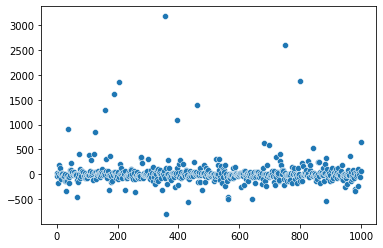

In [37]:
t = np.linspace(0, 1000, 579)
sns.scatterplot(t,feed['GT ']-feed['predict'])

In [40]:
tuned_xlf = xgb.XGBRegressor(colsample_bytree=0.7, max_depth=4, n_estimators=500, seed=1422)
tuned_xlf.fit(X_train, y_train)

pred_best = best.predict(X_test)
print('\nRoot Mean Square error" ', math.sqrt(mean_squared_error(y_test,pred_best)))

[16:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Root Mean Square error"  272.50127355293023


In [50]:
X_train.columns

Index(['year', 'month', 'day', 'hour', 'average_rain_1', 'a_rain_1',
       'b_rain_1', 'c_rain_1', 'd_rain_1', 'e_level_1',
       ...
       'd_rain_5_6hour', 'e_level_5_6hour', 'd_level_5_6hour',
       'average_rain_6_6hour', 'a_rain_6_6hour', 'b_rain_6_6hour',
       'c_rain_6_6hour', 'd_rain_6_6hour', 'e_level_6_6hour',
       'd_level_6_6hour'],
      dtype='object', length=130)

In [54]:
imp = pd.DataFrame({'feature' : X_train.columns, 'importance' : tuned_xlf.feature_importances_})
imp.sort_values(by = 'importance', ascending = False)

feature  importance
16              e_level_2    0.486325
9               e_level_1    0.145861
23              e_level_3    0.121771
30              e_level_4    0.059901
58        e_level_2_3hour    0.031045
43               d_rain_6    0.017837
32         average_rain_5    0.013375
29               d_rain_4    0.010051
42               c_rain_6    0.007242
36               d_rain_5    0.006995
0                    year    0.005408
39         average_rain_6    0.004446
18         average_rain_3    0.003671
91         c_rain_1_6hour    0.003664
98         c_rain_2_6hour    0.003442
115       d_level_4_6hour    0.002874
35               c_rain_5    0.002728
92         d_rain_1_6hour    0.002562
49         c_rain_1_3hour    0.002378
11         average_rain_2    0.002333
107       e_level_3_6hour    0.002013
2                     day    0.001892
31              d_level_4    0.001862
110        a_rain_4_6hour    0.001740
70         c_rain_4_3hour    0.001716
89         a_rain_1_6hour    0.001677
45              d_level_6    0.001668
25         average_rain_4    0.001654
96         a_rain_2_6hour    0.001521
88   average_rain_1_6hour    0.001508
47         a_rain_1_3hour    0.001465
50         d_rain_1_3hour    0.001458
20               b_rain_3    0.001420
73        d_level_4_3hour    0.001416
38              d_level_5    0.001393
113        d_rain_4_6hour    0.001371
27               b_rain_4    0.001255
33               a_rain_5    0.001217
85         d_rain_6_3hour    0.001133
40               a_rain_6    0.001098
17              d_level_2    0.001037
5                a_rain_1    0.001028
22               d_rain_3    0.001007
106        d_rain_3_6hour    0.000968
10              d_level_1    0.000957
54         a_rain_2_3hour    0.000899
84         c_rain_6_3hour    0.000879
76         b_rain_5_3hour    0.000879
12               a_rain_2    0.000799
99         d_rain_2_6hour    0.000795
26               a_rain_4    0.000788
93        e_level_1_6hour    0.000757
119        c_rain_5_6hour    0.000752
95   average_rain_2_6hour    0.000743
108       d_level_3_6hour    0.000719
28               c_rain_4    0.000693
101       d_level_2_6hour    0.000690
7                c_rain_1    0.000688
117        a_rain_5_6hour    0.000683
14               c_rain_2    0.000674
46   average_rain_1_3hour    0.000663
56         c_rain_2_3hour    0.000663
1                   month    0.000652
55         b_rain_2_3hour    0.000620
68         a_rain_4_3hour    0.000612
51        e_level_1_3hour    0.000598
77         c_rain_5_3hour    0.000552
8                d_rain_1    0.000542
129       d_level_6_6hour    0.000539
97         b_rain_2_6hour    0.000537
78         d_rain_5_3hour    0.000537
13               b_rain_2    0.000527
41               b_rain_6    0.000527
66        d_level_3_3hour    0.000514
60   average_rain_3_3hour    0.000474
100       e_level_2_6hour    0.000471
109  average_rain_4_6hour    0.000468
112        c_rain_4_6hour    0.000464
21               c_rain_3    0.000453
6                b_rain_1    0.000440
75         a_rain_5_3hour    0.000440
53   average_rain_2_3hour    0.000403
57         d_rain_2_3hour    0.000391
127        d_rain_6_6hour    0.000362
15               d_rain_2    0.000351
118        b_rain_5_6hour    0.000337
61         a_rain_3_3hour    0.000333
94        d_level_1_6hour    0.000316
120        d_rain_5_6hour    0.000315
104        b_rain_3_6hour    0.000313
24              d_level_3    0.000297
126        c_rain_6_6hour    0.000258
71         d_rain_4_3hour    0.000241
74   average_rain_5_3hour    0.000236
3                    hour    0.000233
4          average_rain_1    0.000216
122       d_level_5_6hour    0.000210
87        d_level_6_3hour    0.000209
121       e_level_5_6hour    0.000207
103        a_rain_3_6hour    0.000193
90         b_rain_1_6hour    0.000193
59        d_level_2_3hour    0.000183
80        d_level_5_3hour    0.000175
81   average_rain_6_3hour    0.000174
83         b_rain_6_3hour   

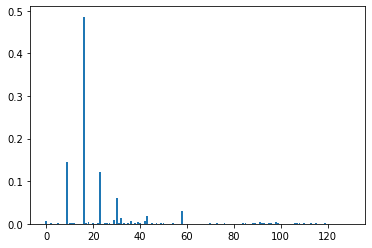

In [43]:
plt.bar(range(len(tuned_xlf.feature_importances_)), tuned_xlf.feature_importances_)
plt.show()

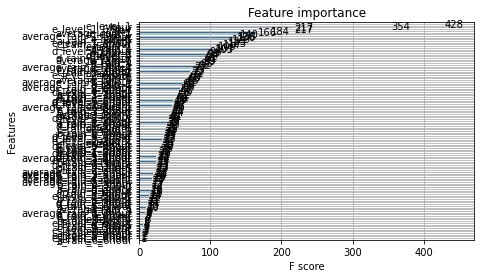

In [48]:
from xgboost import plot_importance

# plot feature importance
plot_importance(tuned_xlf)
plt.show()

no_feature_engineering + GridSearch CV : 261.615

## Pycaret

In [38]:
from pycaret.regression import *

df1 = df[:-160]
df1= df1.drop('num',axis =1 )
df1

year  month  day  hour      target  average_rain_1  a_rain_1  b_rain_1  \
0     2006      7   10     8  189.100000          6.4000         7         7   
1     2006      7   10     9  216.951962          6.3000         7         8   
2     2006      7   10    10  251.424419          6.4000         7         9   
3     2006      7   10    11  302.812199          7.3000         7        10   
4     2006      7   10    12  384.783406          8.2000         7        12   
...    ...    ...  ...   ...         ...             ...       ...       ...   
2886  2017      7   18    18  513.368437         22.7836         6         0   
2887  2017      7   18    19  502.846843          8.2586         2         0   
2888  2017      7   18    20  491.954805          4.1089         1         0   
2889  2017      7   18    21  481.103083          3.3854         1         0   
2890  2017      7   18    22  470.458109          3.2841         1         0   

      c_rain_1  d_rain_1  e_level_1  d_level_1  average_rain_2  a_rain_2  \
0            7         8       2.54  122.56875          6.3000         7   
1            7         8       2.53  122.56250          6.4000         7   
2            7         8       2.53  122.55625          7.3000         7   
3            7         8       2.53  122.55625          8.2000         7   
4            8        10       2.53  122.55625         11.3000         9   
...        ...       ...        ...        ...             ...       ...   
2886         1         1       3.03  137.16875          8.2586         6   
2887         1         1       3.00  137.18125          4.1089         2   
2888         1         1       2.98  137.18750          3.3854         1   
2889         1         1       2.96  137.19375          3.2841         1   
2890         1         1       2.94  137.20625          2.7514         1   

      b_rain_2  c_rain_2  d_rain_2  e_level_2   d_level_2  average_rain_3  \
0            7         7         8       2.54  122.541667          6.3000   
1            8         7         8       2.53  122.550000          6.4000   
2            9         7         8       2.53  122.558333          7.3000   
3           10         8         8       2.53  122.566667          8.2000   
4           12        10        10       2.53  122.575000         11.3000   
...        ...       ...       ...        ...         ...             ...   
2886         0         1         1       3.03  137.200000          8.2586   
2887         0         1         1       3.00  137.200000          4.1089   
2888         0         1         1       2.98  137.200000          3.3854   
2889         0         1         1       2.96  137.200000          3.2841   
2890         0         1         1       2.94  137.208333          2.7514   

      a_rain_3  b_rain_3  c_rain_3  d_rain_3  e_level_3   d_level_3  \
0            7         7         7         8       2.54  122.550000   
1            7         8         7         8       2.53  122.558333   
2            7         9         8         8       2.53  122.566667   
3            7        10        10        10       2.53  122.575000   
4            9        12        10        11       2.53  122.575000   
...        ...       ...       ...       ...        ...         ...   
2886         6         0         1         1       3.03  137.200000   
2887         2         0         1         1       3.00  137.200000   
2888         1         0         1         1       2.98  137.200000   
2889         1         0         1         1       2.96  137.208333   
2890         1         0         1         1       2.94  137.216667   

      average_rain_4  a_rain_4  b_rain_4  c_rain_4  d_rain_4  e_level_4  \
0             6.4000         7         7         8         8       2.54   
1             7.3000         7         8        10        10       2.53   
2             8.2000         7         9        10        11       2.53   
3            11.3000         9        10        15    

In [39]:
pyc = setup(df1, target = 'target',date_features =['year','month','day','hour'], session_id = 1422)

Description             Value
0                               session_id              1422
1                                   Target            target
2                            Original Data        (2891, 47)
3                           Missing Values             False
4                         Numeric Features                42
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (2023, 33)
10                    Transformed Test Set         (868, 33)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              55ea
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [40]:
compare_models()

Model        MAE           MSE       RMSE  \
et                  Extra Trees Regressor   143.3938  1.167439e+05   339.7000   
lightgbm  Light Gradient Boosting Machine   270.0098  2.986671e+05   537.6768   
rf                Random Forest Regressor   221.4956  3.118544e+05   534.9524   
knn                 K Neighbors Regressor   272.1349  3.019478e+05   547.2147   
gbr           Gradient Boosting Regressor   395.5023  4.512723e+05   668.9124   
dt                Decision Tree Regressor   254.8536  5.328321e+05   708.8942   
ada                    AdaBoost Regressor   679.8669  9.375812e+05   963.6090   
lr                      Linear Regression   740.5013  1.410072e+06  1182.7856   
ridge                    Ridge Regression   740.4488  1.410053e+06  1182.7775   
lasso                    Lasso Regression   739.7804  1.410308e+06  1182.8668   
en                            Elastic Net   739.8201  1.423390e+06  1188.5542   
br                         Bayesian Ridge   741.5997  1.429583e+06  1191.1166   
lar                Least Angle Regression   752.9412  1.433171e+06  1192.8507   
llar         Lasso Least Angle Regression   706.6582  1.522314e+06  1222.7248   
omp           Orthogonal Matching Pursuit   760.8590  1.656030e+06  1277.4890   
huber                     Huber Regressor   638.0786  1.729642e+06  1294.4144   
par          Passive Aggressive Regressor  1092.3655  3.408307e+06  1783.3931   

              R2   RMSLE    MAPE  TT (Sec)  
et        0.9738  0.2580  0.1693     0.799  
lightgbm  0.9363  0.3927  0.3635     0.155  
rf        0.9340  0.3215  0.2442     1.208  
knn       0.9317  0.3863  0.3102     0.063  
gbr       0.8977  0.5296  0.6046     0.333  
dt        0.8835  0.3955  0.2592     0.026  
ada       0.7862  0.8761  1.6051     0.100  
lr        0.6877  0.8843  1.1034     0.254  
ridge     0.6877  0.8858  1.1027     0.014  
lasso     0.6876  0.8811  1.0936     0.023  
en        0.6845  0.9664  0.9671     0.023  
br        0.6833  0.9946  0.9491     0.016  
lar       0.6807  0.9045  1.1326     0.019  
llar      0.6720  0.9497  0.9010     0.015  
omp       0.6405  0.9217  1.0452     0.013  
huber     0.6376  0.7819  0.6758     0.078  
par       0.2766  1.0361  1.0688     0.016

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1422, verbose=0, warm_start=False)

546.5044373104394